# CUSTOMER CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Understanding

In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [4]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [12]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [13]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [14]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [16]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [17]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [18]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [19]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [20]:
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [21]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
continous = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
discrete = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited'] 

# Exploratory Data Analysis

FOR CONTINOUS

In [24]:
df[continous].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


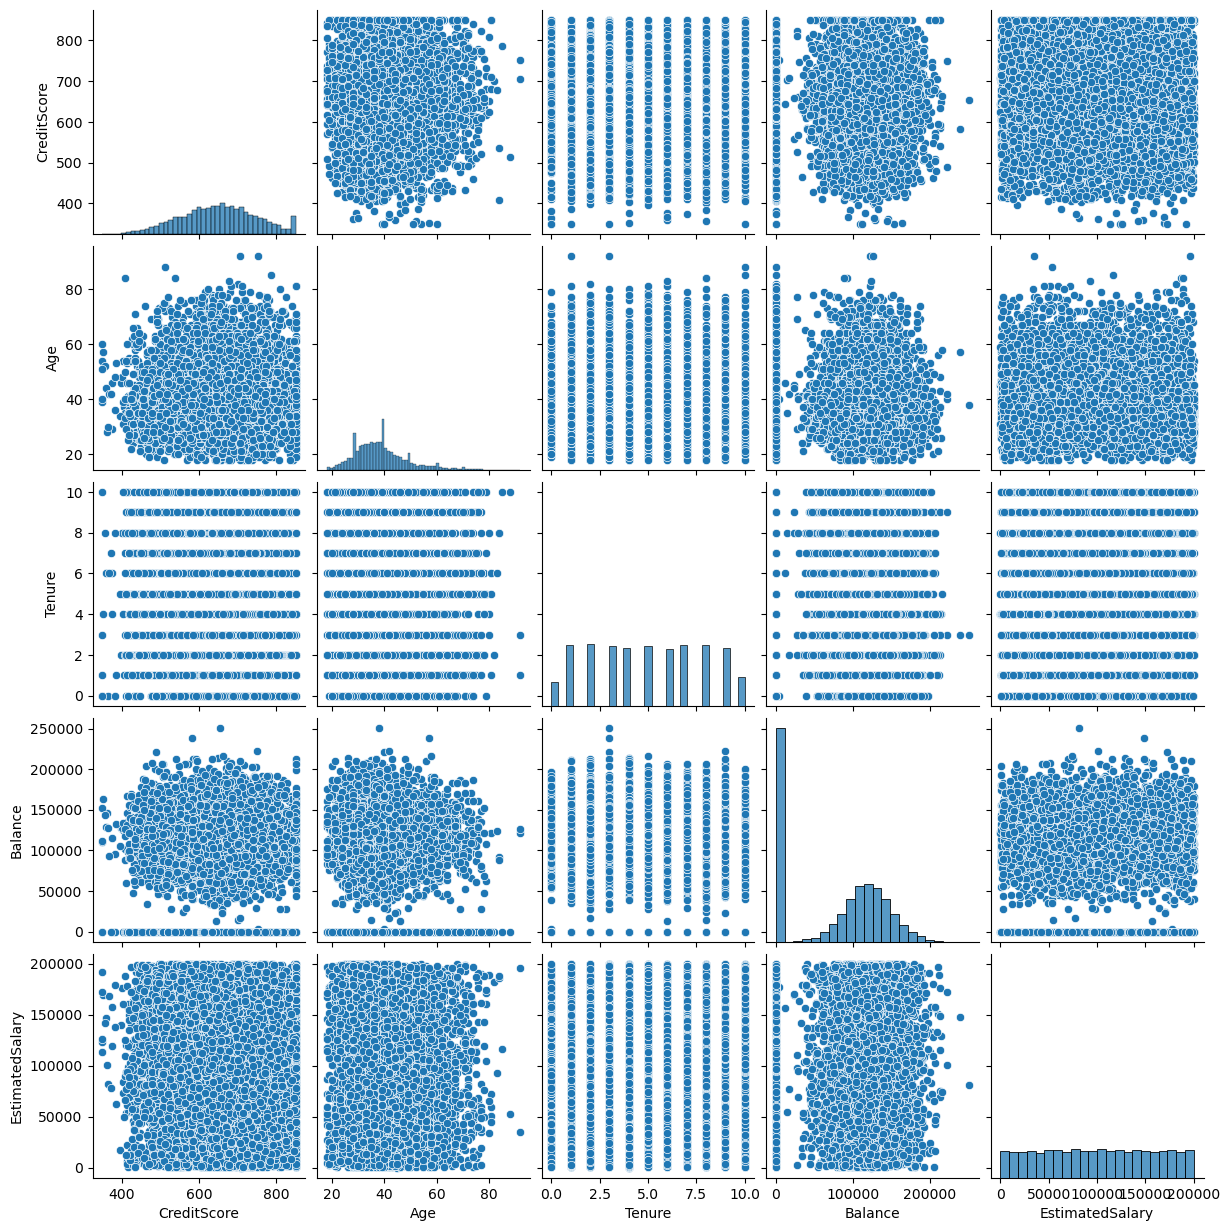

In [25]:
sns.pairplot(df[continous])
plt.show()

In [25]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

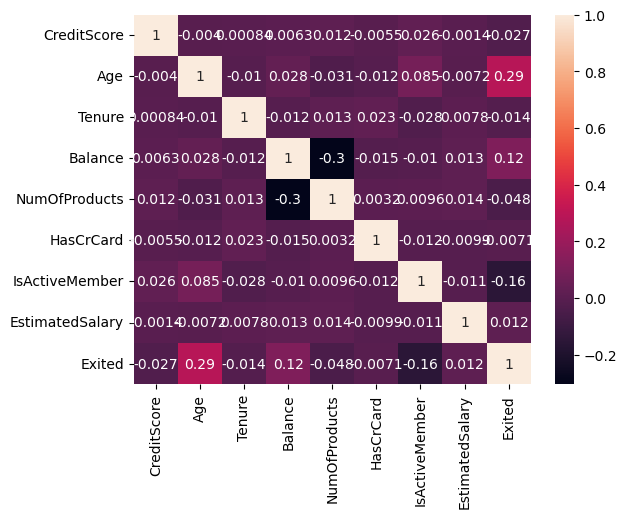

In [26]:
sns.heatmap(df.corr(),annot = True)

FOR DISCRETE

In [27]:
df[discrete].describe(include = 'all')

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000
unique,3,2,NaN,NaN,NaN,NaN
top,France,Male,NaN,NaN,NaN,NaN
freq,5014,5457,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.530200,0.70550,0.515100,0.203700
std,NaN,NaN,0.581654,0.45584,0.499797,0.402769
min,NaN,NaN,1.000000,0.00000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.00000,0.000000,0.000000
50%,NaN,NaN,1.000000,1.00000,1.000000,0.000000
75%,NaN,NaN,2.000000,1.00000,1.000000,0.000000


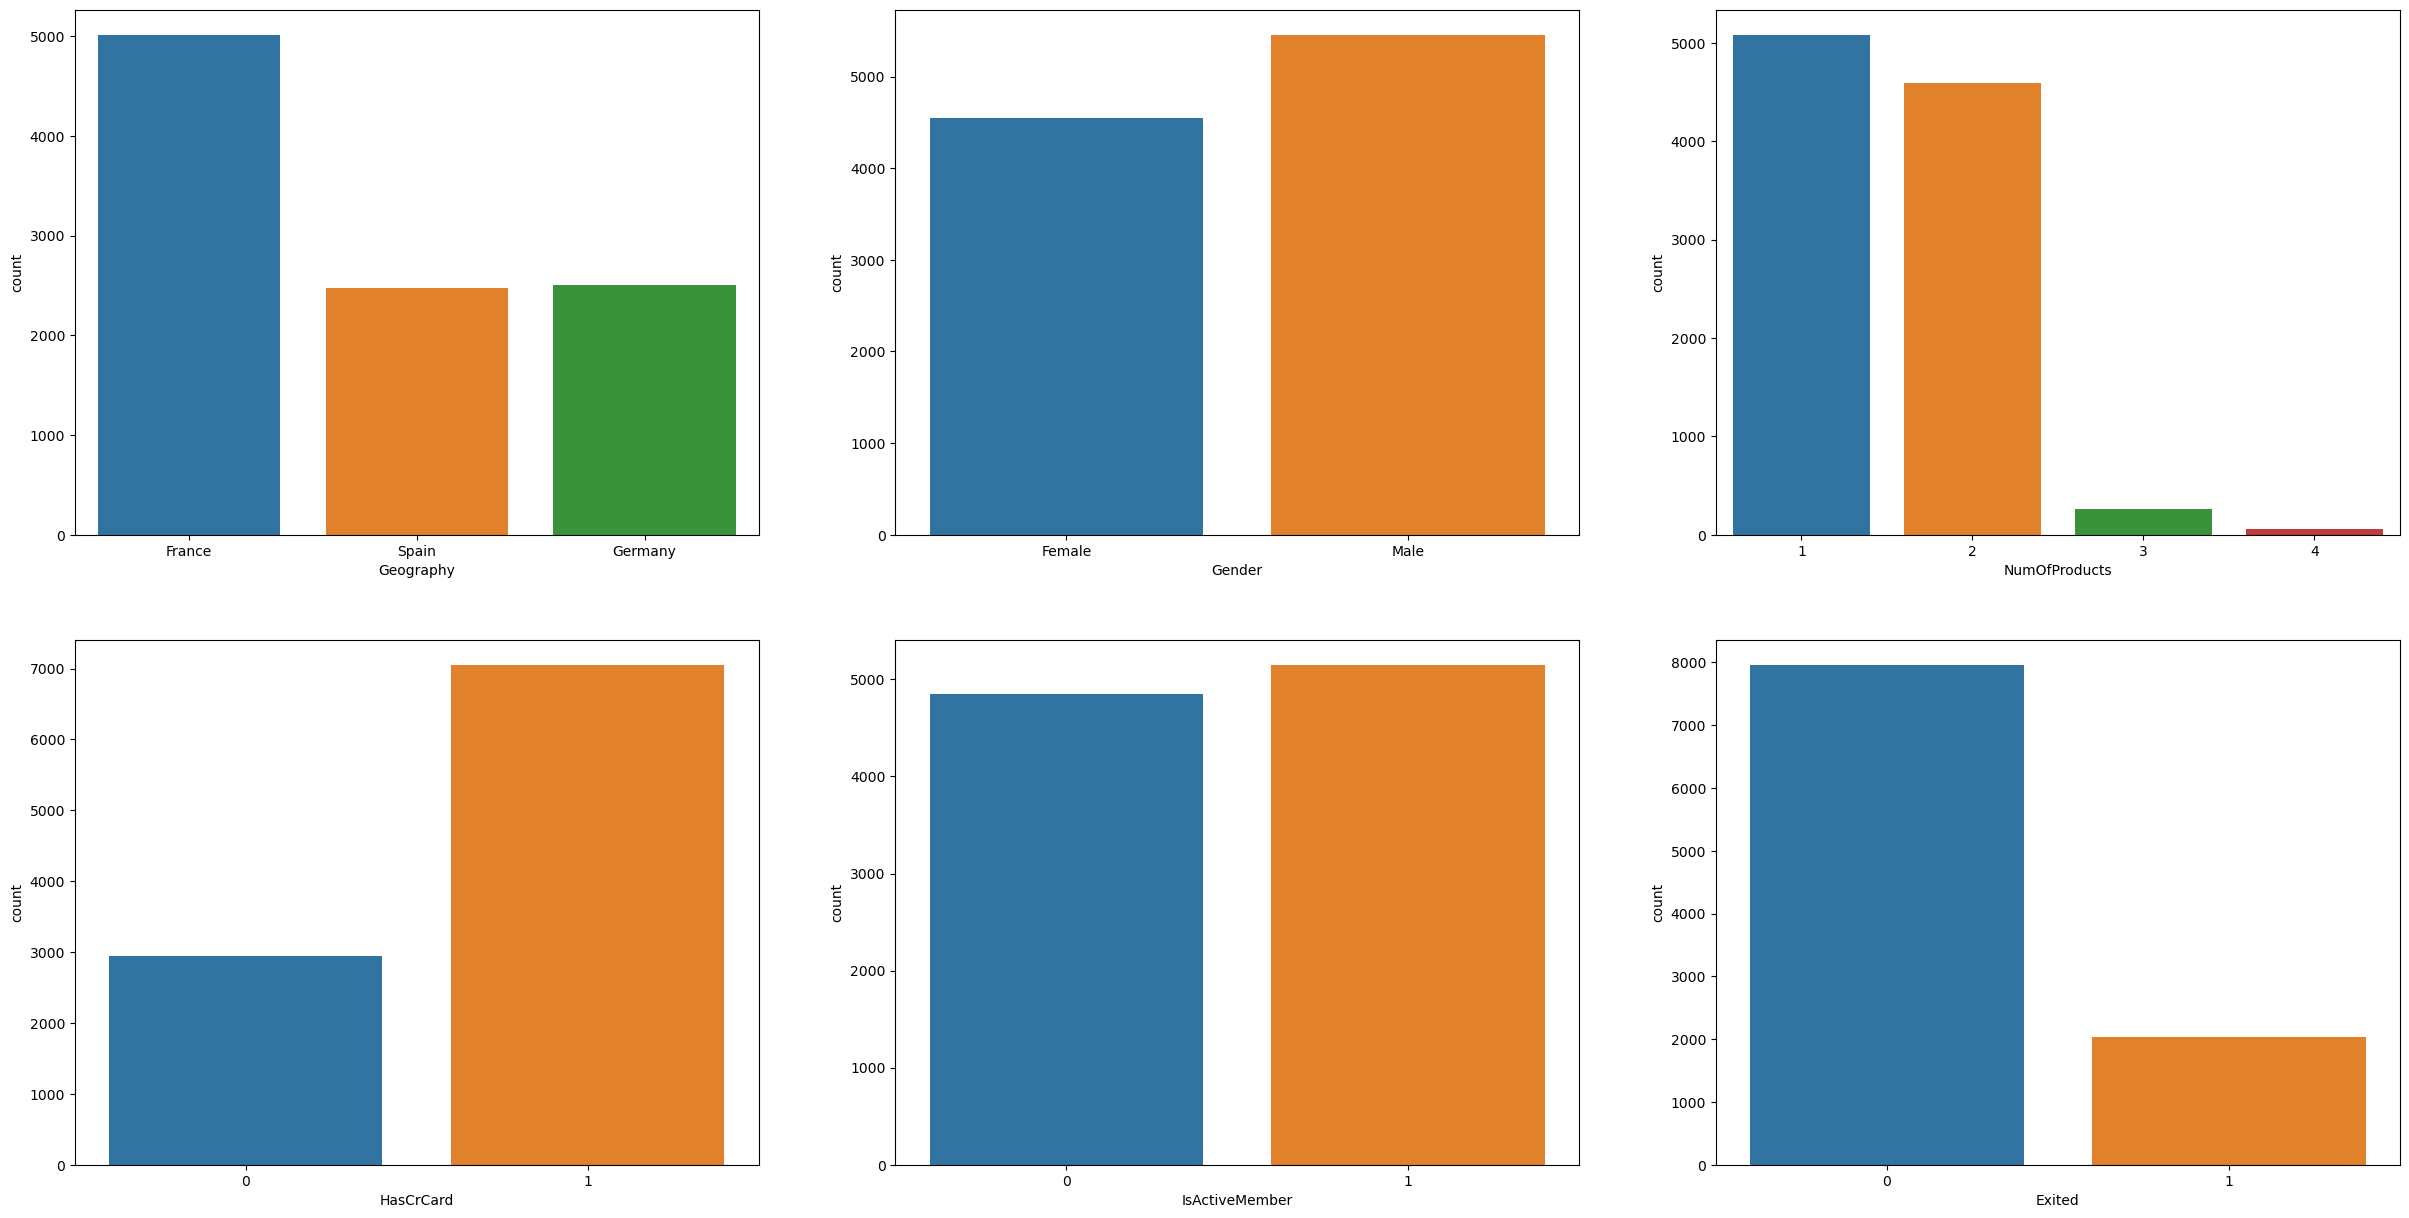

In [28]:
plt.figure(figsize = (30,15))

plt.subplot(2,3,1)
sns.countplot(x = df['Geography'])

plt.subplot(2,3,2)
sns.countplot(x = df['Gender'])

plt.subplot(2,3,3)
sns.countplot(x = df['NumOfProducts'])

plt.subplot(2,3,4)
sns.countplot(x = df['HasCrCard'])

plt.subplot(2,3,5)
sns.countplot(x = df['IsActiveMember'])

plt.subplot(2,3,6)
sns.countplot(x = df['Exited'])

plt.show()

# Data Preprocessing

**DATA CLEANING**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [30]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

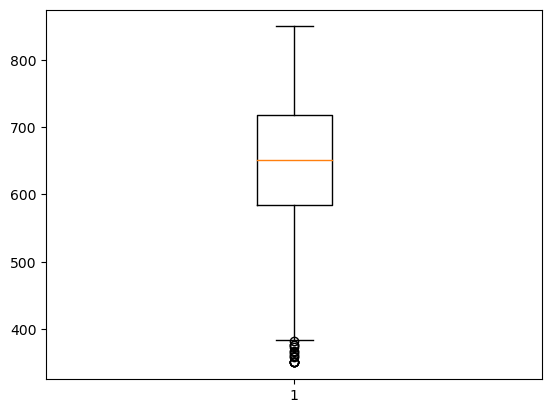

In [32]:
# Checking outliers
plt.boxplot(df['CreditScore'])
plt.show()

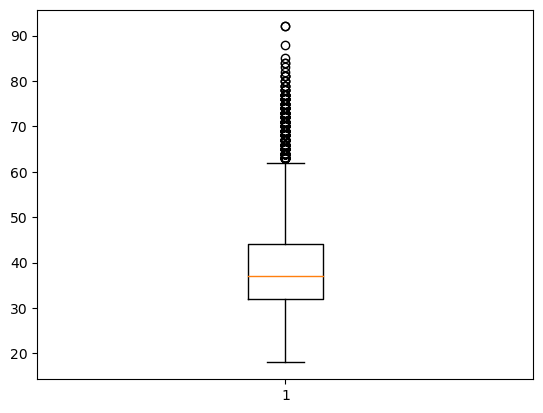

In [33]:
plt.boxplot(df['Age'])
plt.show()

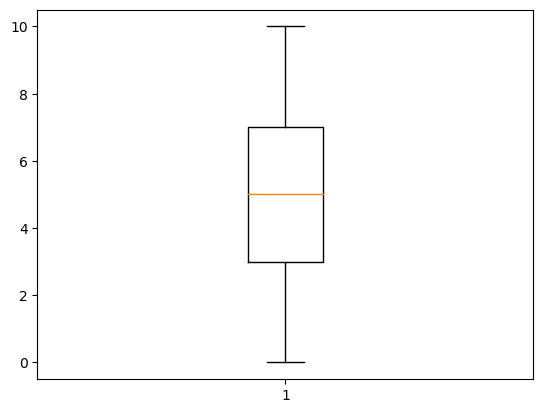

In [34]:
plt.boxplot(df['Tenure'])
plt.show()

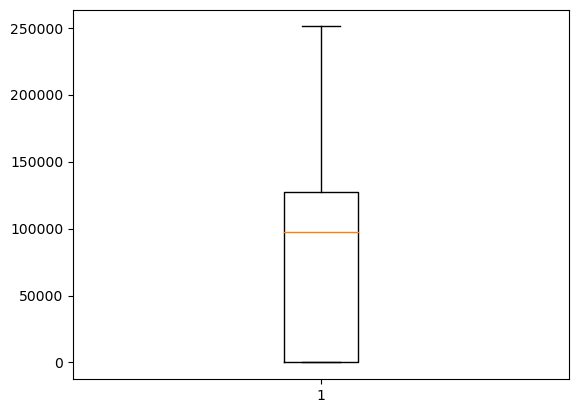

In [35]:
plt.boxplot(df['Balance'])
plt.show()

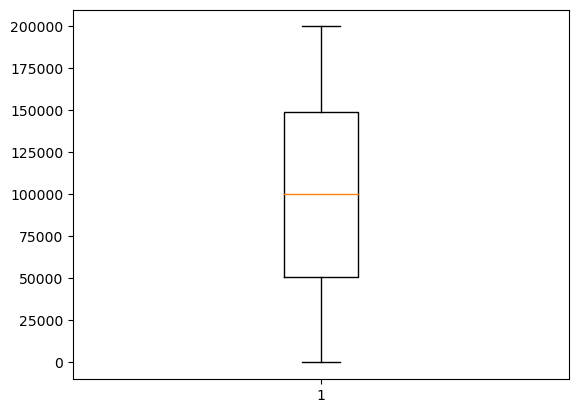

In [36]:
plt.boxplot(df['EstimatedSalary'])
plt.show()

**DATA WRANGLING**

In [37]:
df[continous].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [38]:
# encoding
df['Gender'].replace({'Male':0,'Female':1},inplace = True)
df = pd.concat((df,pd.get_dummies(df['Geography'],drop_first = True)),axis = 1)
df.drop(columns = 'Geography',inplace = True)

In [39]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [40]:
X = df.drop(columns = 'Exited')
y = df['Exited']

In [41]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

# Modelling

**LOGISTIC REGRESSION**

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(lr,X,y,cv=5).mean())

acc_train: 0.808625
acc_test: 0.811
cross_val: 0.8096


**Best random state number**

In [43]:
acc_train=[]
acc_test=[]
cross_val=[]
for i in range(0,101):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    ypred_train = lr.predict(X_train)
    ypred_test = lr.predict(X_test)
    acc_train.append(accuracy_score(y_train,ypred_train))
    acc_test.append(accuracy_score(y_test,ypred_test))
    cross_val.append(cross_val_score(lr,X,y,cv=5).mean())
    
wh = pd.DataFrame({'train':acc_train,'test':acc_test,'cv':cross_val})
hh = wh[(abs(wh['train']-wh['test'])<=0.05) & (abs(wh['cv']-wh['test'])<=0.05)]
hh[hh['test']==hh['test'].max()].index.tolist()[0]

39

In [44]:
# rebuilding model with best random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 39)

#modelling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(lr,X,y,cv=5).mean())

acc_train: 0.807875
acc_test: 0.8275
cross_val: 0.8096


In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[1564,   53],
       [ 292,   91]], dtype=int64)

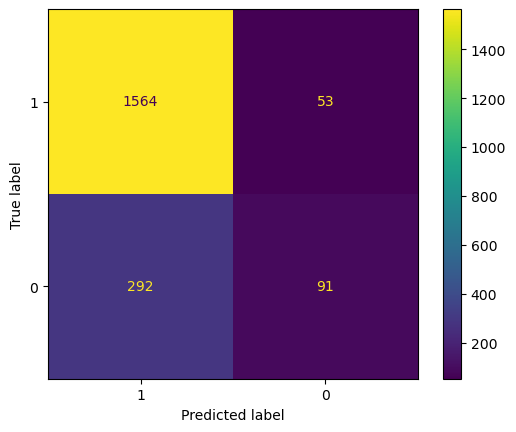

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Exited'].unique()).plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1617
           1       0.63      0.24      0.35       383

    accuracy                           0.83      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.80      0.83      0.79      2000



**KNN**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param = {'n_neighbors':list(range(1,51))}
model = GridSearchCV(estimator ,param, cv=5, scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 13}

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(knn,X,y,cv = 5).mean())

acc_train: 0.854875
acc_test: 0.8495
cross_val: 0.8382


In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[1568,   49],
       [ 252,  131]], dtype=int64)

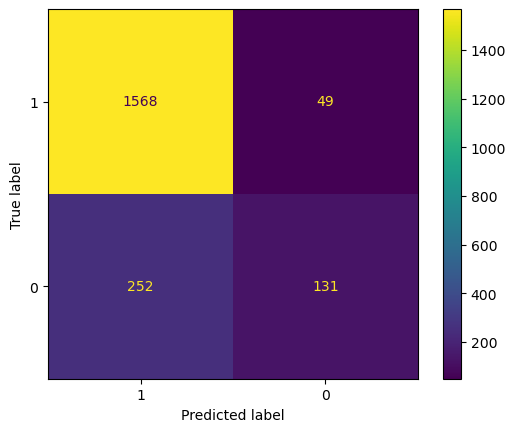

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Exited'].unique()).plot()
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1617
           1       0.73      0.34      0.47       383

    accuracy                           0.85      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.84      0.85      0.83      2000



**DECISION TREE**

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)

ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(dt,X,y,cv=5).mean())

acc_train: 1.0
acc_test: 0.788
cross_val: 0.7906


VISUALIZATION OF TREE

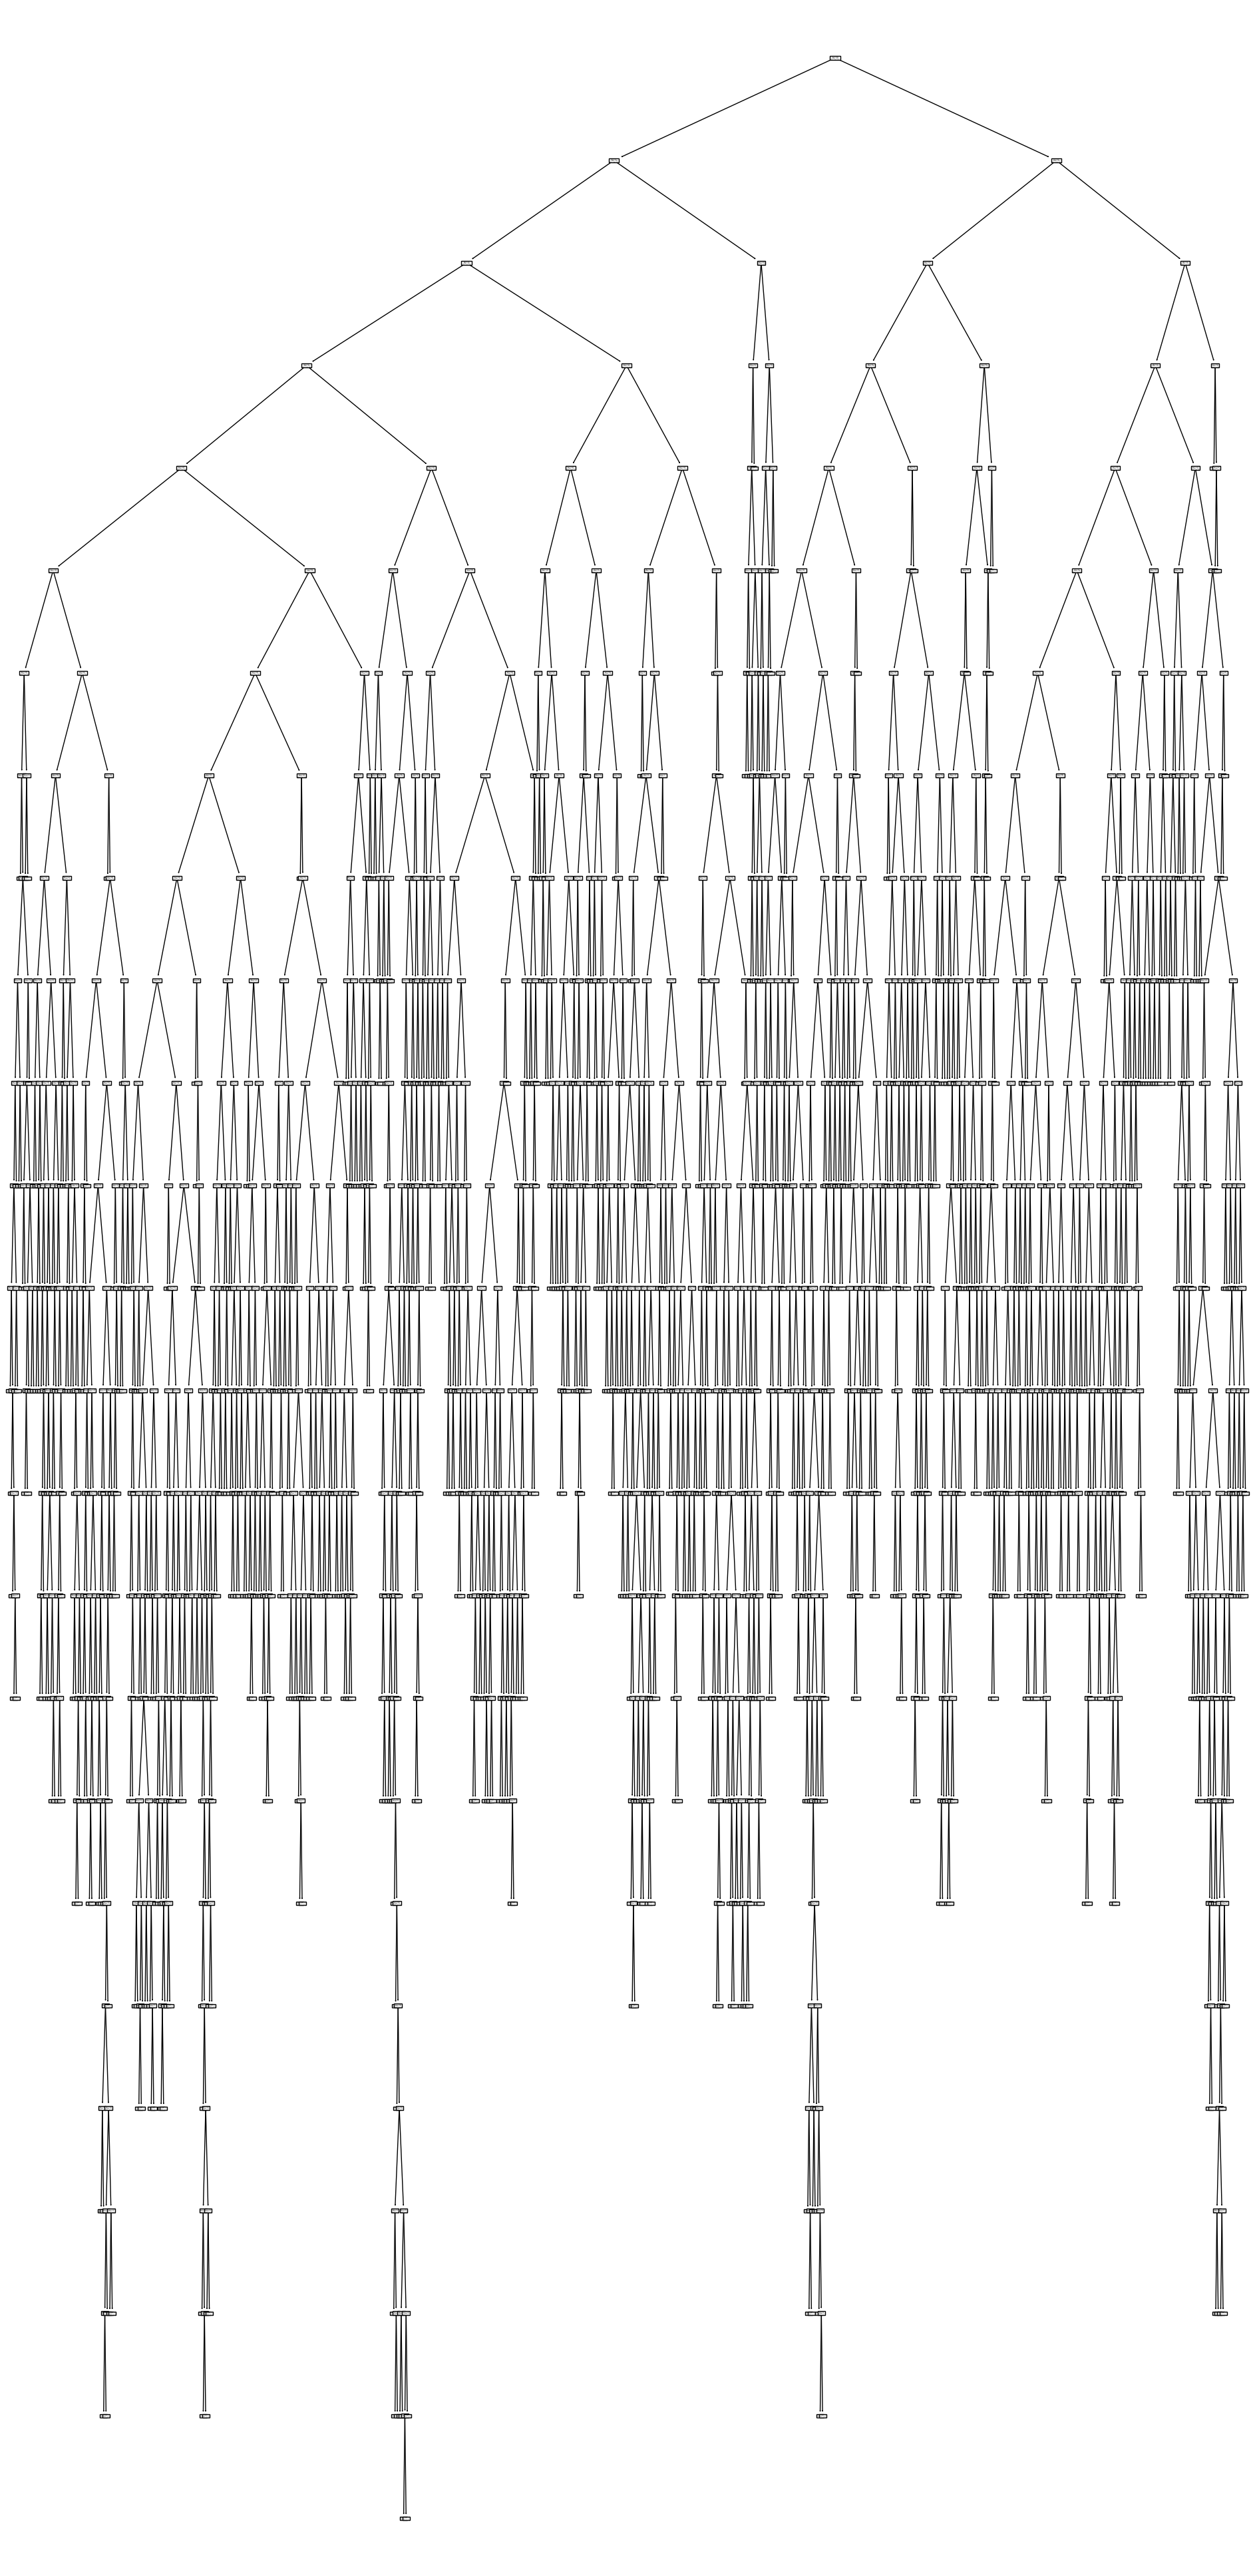

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize = (24,50))
plot_tree(dt)
plt.show()

In [54]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state = 0)
param = {'criterion':['gini','entropy'],'max_depth':[1,3,5,7,8,10,15,23]}
model = GridSearchCV(estimator,param,cv=5,scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [55]:
model.best_estimator_.feature_importances_

array([0.01903991, 0.00351114, 0.39790167, 0.00596389, 0.13475921,
       0.28693168, 0.00194459, 0.08190412, 0.03044837, 0.03759541,
       0.        ])

In [56]:
dtimp = pd.DataFrame(data =model.best_estimator_.feature_importances_ 
                     , index =X.columns 
                     ,columns = ['feature_importance'])
dt_imp = dtimp[dtimp['feature_importance']!=0].index.tolist()
dt_imp

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany']

In [58]:
# rebuilding model with best parameters
X_imp_dt = X[dt_imp]
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_imp_dt,y,test_size=0.2,random_state=39)
# modelling
from sklearn.tree import DecisionTreeClassifier
dt_best = DecisionTreeClassifier(random_state = 0, criterion ='entropy', max_depth = 7)
dt_best.fit(X_train_dt,y_train_dt)

# prediction
ypred_train = dt_best.predict(X_train_dt)
ypred_test = dt_best.predict(X_test_dt)

# evaluation
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train_dt,ypred_train))
print('acc_test:',accuracy_score(y_test_dt,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(dt_best,X_imp_dt,y,cv=5).mean())

acc_train: 0.86875
acc_test: 0.8615
cross_val: 0.8554999999999999


In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_dt,ypred_test)
cm

array([[1528,   89],
       [ 188,  195]], dtype=int64)

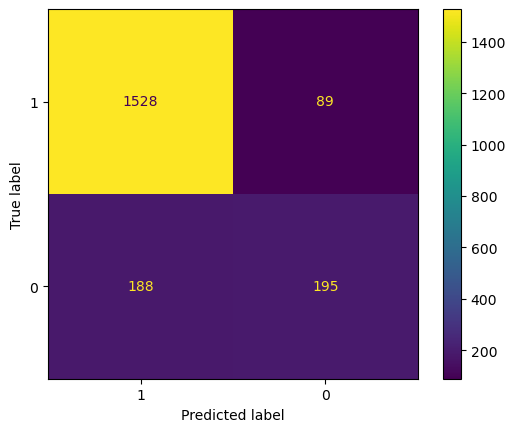

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df['Exited'].unique()).plot()
plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dt,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1617
           1       0.69      0.51      0.58       383

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



**RANDOM FOREST**

In [62]:
# hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state = 0)
param = {'n_estimators':list(range(1,101))}
model = GridSearchCV(estimator,param,cv=5,scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'n_estimators': 100}

In [63]:
model.best_estimator_.feature_importances_

array([0.14374094, 0.0181107 , 0.24128194, 0.07978796, 0.14192115,
       0.13027515, 0.01883701, 0.04281333, 0.14553364, 0.02402315,
       0.01367503])

In [64]:
rfimp = pd.DataFrame(data =model.best_estimator_.feature_importances_ 
                     , index =X.columns 
                     ,columns = ['feature_importance'])
rf_imp = rfimp[rfimp['feature_importance']!=0].index.tolist()
rf_imp

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain']

In [66]:
# rebuilding model with best parameters
X_imp_rf = X[rf_imp]
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_imp_rf,y,test_size=0.2,random_state=39)
# modelling
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train_rf,y_train_rf)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train_rf,ypred_train))
print('acc_test:',accuracy_score(y_test_rf,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(rf,X_imp_rf,y,cv=5).mean())

acc_train: 0.999875
acc_test: 0.87
cross_val: 0.8641


In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_rf,ypred_test)
cm

array([[1556,   61],
       [ 199,  184]], dtype=int64)

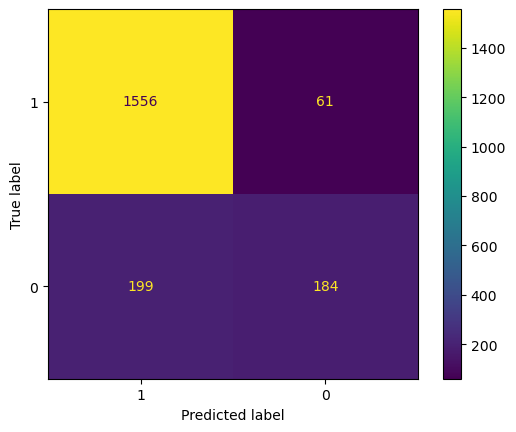

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df['Exited'].unique()).plot()
plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rf,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1617
           1       0.75      0.48      0.59       383

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



**ADABOOST**

In [70]:
# hyperparameter tuning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier()
param = {'n_estimators':list(range(1,101))}
model = GridSearchCV(estimator,param,cv=5,scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'n_estimators': 13}

In [71]:
model.best_estimator_.feature_importances_

array([0.07692308, 0.07692308, 0.38461538, 0.        , 0.07692308,
       0.23076923, 0.        , 0.07692308, 0.        , 0.07692308,
       0.        ])

In [72]:
abimp = pd.DataFrame(data =model.best_estimator_.feature_importances_ 
                     , index =X.columns 
                     ,columns = ['feature_importance'])
ab_imp = abimp[abimp['feature_importance']!=0].index.tolist()
ab_imp

['CreditScore',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Germany']

In [73]:
X_imp_ab = X[ab_imp]
X_train_ab,X_test_ab,y_train_ab,y_test_ab = train_test_split(X_imp_ab,y,test_size=0.2,random_state=39)
# modelling
from sklearn.ensemble import AdaBoostClassifier
ab_best = AdaBoostClassifier(n_estimators = 13)
ab_best.fit(X_train_ab,y_train_ab)

# prediction
ypred_train = ab_best.predict(X_train_ab)
ypred_test = ab_best.predict(X_test_ab)

# evaluation
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train_ab,ypred_train))
print('acc_test:',accuracy_score(y_test_ab,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(ab_best,X_imp_ab,y,cv=5).mean())

acc_train: 0.85525
acc_test: 0.8695
cross_val: 0.8543


In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_ab,ypred_test)
cm

array([[1567,   50],
       [ 211,  172]], dtype=int64)

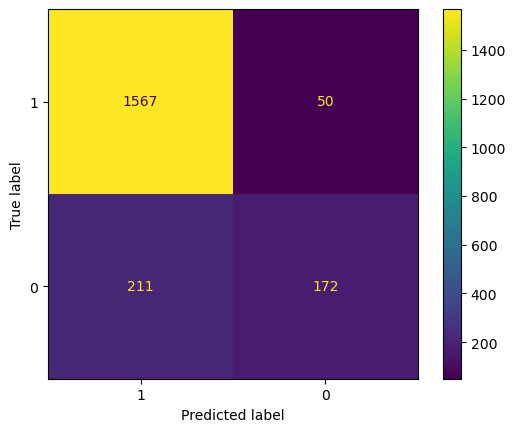

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['Exited'].unique()).plot()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ab,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1617
           1       0.77      0.45      0.57       383

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.86      2000



**GRADIENT BOOST**

In [77]:
# hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param = {'n_estimators':list(range(1,51)),'learning_rate':[0.1,0.2,0.4,0.8,1]}
model = GridSearchCV(estimator,param,cv=5,scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'learning_rate': 0.2, 'n_estimators': 44}

In [78]:
model.best_estimator_.feature_importances_

array([1.91847408e-02, 1.05568774e-02, 4.09004566e-01, 3.22513498e-03,
       7.68282588e-02, 3.02642117e-01, 2.30622452e-04, 1.11510306e-01,
       1.59433397e-02, 4.92438524e-02, 1.63018543e-03])

In [79]:
gbimp = pd.DataFrame(data =model.best_estimator_.feature_importances_ 
                     , index =X.columns 
                     ,columns = ['feature_importance'])
gb_imp = gbimp[gbimp['feature_importance']!=0].index.tolist()
gb_imp

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain']

In [80]:
X_imp_gb = X[gb_imp]
X_train_gb,X_test_gb,y_train_gb,y_test_gb = train_test_split(X_imp_gb,y,test_size=0.2,random_state=39)
# modelling
from sklearn.ensemble import GradientBoostingClassifier
gb_best = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 44)
gb_best.fit(X_train_gb,y_train_gb)

# prediction
ypred_train = gb_best.predict(X_train_gb)
ypred_test = gb_best.predict(X_test_gb)

# evaluation
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train_gb,ypred_train))
print('acc_test:',accuracy_score(y_test_gb,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(gb_best,X_imp_gb,y,cv=5).mean())

acc_train: 0.868625
acc_test: 0.871
cross_val: 0.8646


In [81]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_gb,ypred_test)
cm

array([[1557,   60],
       [ 198,  185]], dtype=int64)

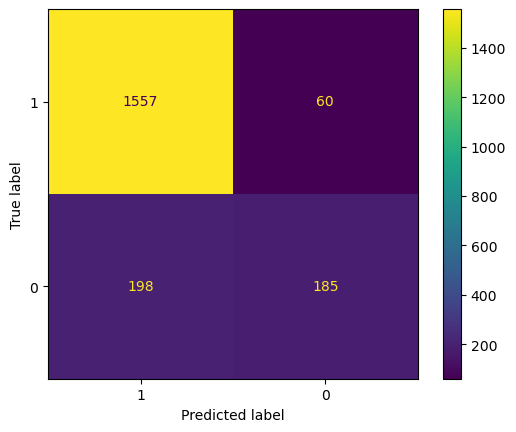

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['Exited'].unique()).plot()
plt.show()

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gb,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1617
           1       0.76      0.48      0.59       383

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



**XGBOOST**

In [84]:
# hyperparameter tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier()
param = {'n_estimators':list(range(1,51)),'max_depth':[1,3,5,8,9],'gamma':[0.1,0.4,0.6,0.8,1]}
model = GridSearchCV(estimator,param,cv=5,scoring = 'accuracy')
model.fit(X_train,y_train)
model.best_params_

{'gamma': 1, 'max_depth': 5, 'n_estimators': 12}

In [85]:
model.best_estimator_.feature_importances_

array([0.02065953, 0.05689377, 0.21870816, 0.01996926, 0.05900771,
       0.229539  , 0.01220914, 0.22475682, 0.01881157, 0.09690382,
       0.04254113], dtype=float32)

In [86]:
xgbimp = pd.DataFrame(data =model.best_estimator_.feature_importances_ 
                     , index =X.columns 
                     ,columns = ['feature_importance'])
xgb_imp = xgbimp[xgbimp['feature_importance']!=0].index.tolist()
xgb_imp

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain']

In [87]:
X_imp_xgb = X[xgb_imp]
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb=train_test_split(X_imp_xgb,y,test_size=0.2,random_state=39)
# modelling
from xgboost import XGBClassifier
xgb_best = XGBClassifier(gamma = 1, max_depth = 5, n_estimators = 12)
xgb_best.fit(X_train_xgb,y_train_xgb)

# prediction
ypred_train = xgb_best.predict(X_train_xgb)
ypred_test = xgb_best.predict(X_test_xgb)

# evaluation
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train_xgb,ypred_train))
print('acc_test:',accuracy_score(y_test_xgb,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(xgb_best,X_imp_xgb,y,cv=5).mean())

acc_train: 0.87325
acc_test: 0.8715
cross_val: 0.8623000000000001


In [88]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_xgb,ypred_test)
cm

array([[1550,   67],
       [ 190,  193]], dtype=int64)

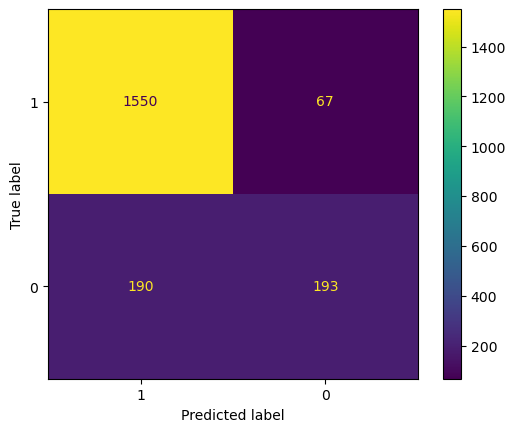

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['Exited'].unique()).plot()
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1617
           1       0.74      0.50      0.60       383

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
logistic 345
acc_train: 0.807875
acc_test: 0.8275
cross_val: 0.8096
    
knn 301
acc_train: 0.854875
acc_test: 0.8495
cross_val: 0.8382
    
decision 277
acc_train: 0.86875
acc_test: 0.8615
cross_val: 0.8554999999999999

random 260
acc_train: 0.999875
acc_test: 0.87
cross_val: 0.8641

adaboost 261
acc_train: 0.85525
acc_test: 0.8695
cross_val: 0.8543

gradient boost 258
acc_train: 0.868625
acc_test: 0.871
cross_val: 0.8646

xgboost 257
acc_train: 0.87325
acc_test: 0.8715
cross_val: 0.8623000000000001

# XGBOOST is the best model with 87% accuracy

**SAVING THE MODEL**

In [91]:
from pickle import dump
dump(xgb_best,open('xgb_best.pkl','wb'))